In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

### Reading and Merge Personal Information ( 2nd sheet of all files )

In [2]:
personal_info=[]
for a in ['R','U']:
    temp=[]
    for b in ['98','99','1400','1401']:
        print(a,b)
        sheet_name=pd.ExcelFile('data/'+a+b+'.xlsx').sheet_names[1]
        x=pd.read_excel('data/'+a+b+'.xlsx',sheet_name=sheet_name)
        x['year']=b
        temp.append(x)
    x=pd.concat(temp)
    x['state']=a
    personal_info.append(x)
personal_info=pd.concat(personal_info)

R 98
R 99
R 1400
R 1401
U 98
U 99
U 1400
U 1401


In [20]:
personal_info

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year,state
0,20010394208,1,Head,Male,50,literate,No,Elemantry,employed,Married,98,R
1,20010394208,2,Spouse,Female,45,illiterate,NaN,NaN,Housewife,Married,98,R
2,20010394208,3,Child,Female,26,literate,No,Elemantry,Housewife,Married,98,R
3,20010394208,4,Child,Male,25,literate,No,Bachelor,employed,Single,98,R
4,20010394208,5,Child,Male,14,literate,Yes,Secondary,Student,Single,98,R
...,...,...,...,...,...,...,...,...,...,...,...,...
64730,12603320429,3,Child,Male,43,literate,No,Diploma,employed,Single,1401,U
64731,12603320429,4,Child,Male,27,literate,No,Secondary,unemployed,Single,1401,U
64732,12603320429,5,Child,Female,40,literate,No,Diploma,employed,Divorced,1401,U
64733,12603320429,6,Child,Male,37,literate,No,Diploma,employed,Single,1401,U


In [3]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516886 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        474192 non-null  object
 6   studying        400044 non-null  object
 7   degree          400042 non-null  object
 8   occupationalst  438828 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(3), object(9)
memory usage: 51.3+ MB


### fill gender null values with mode ( we have only 2 null values in gender column)

In [11]:
personal_info['gender'].fillna(personal_info['gender'].mode()[0],inplace=True)

In [13]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        474192 non-null  object
 6   studying        400044 non-null  object
 7   degree          400042 non-null  object
 8   occupationalst  438828 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(3), object(9)
memory usage: 51.3+ MB


### checking literacy column

<Axes: xlabel='age', ylabel='Count'>

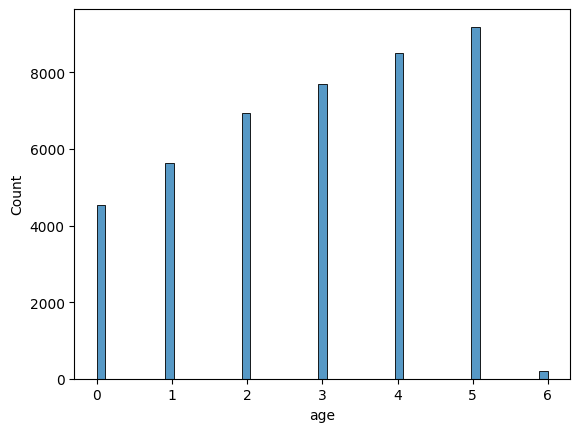

In [19]:
sns.histplot(personal_info[personal_info.literacy.isna()]['age'])

### All Null values at literacy column are under 6 years old kids

### So they are illiterate

In [21]:
personal_info.literacy.fillna('illiterate',inplace=True)

In [23]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        516888 non-null  object
 6   studying        400044 non-null  object
 7   degree          400042 non-null  object
 8   occupationalst  438828 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(3), object(9)
memory usage: 51.3+ MB


### checking studying

<Axes: xlabel='age', ylabel='Count'>

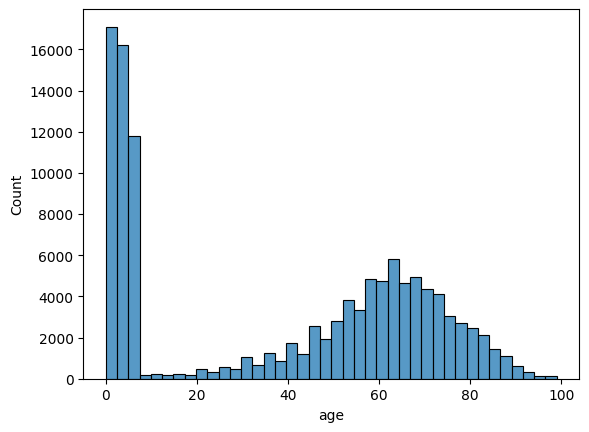

In [24]:
sns.histplot(personal_info[personal_info.studying.isna()]['age'])

In [35]:
personal_info[personal_info.studying.isna()][['literacy']].value_counts()

literacy  
illiterate    116844
Name: count, dtype: int64

### All Studying null Values are illiterated so we are sure they are not studying

In [36]:
personal_info.studying.fillna('No',inplace=True)

In [37]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        516888 non-null  object
 6   studying        516888 non-null  object
 7   degree          400042 non-null  object
 8   occupationalst  438828 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(3), object(9)
memory usage: 51.3+ MB


<Axes: xlabel='degree', ylabel='Count'>

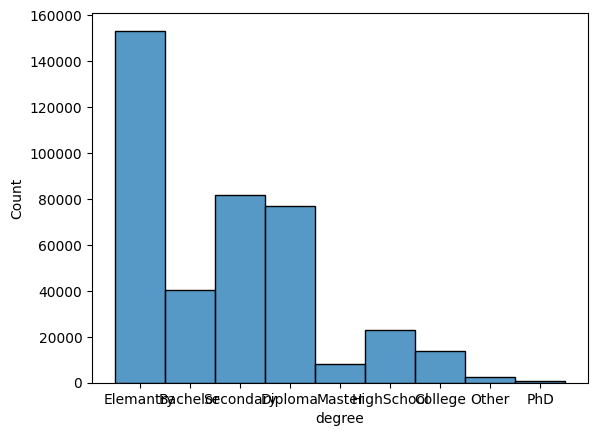

In [50]:
sns.histplot(personal_info['degree'])

### Degree is an ordinal column

In [51]:
personal_info['degree'].unique()

array(['Elemantry', nan, 'Bachelor', 'Secondary', 'Diploma', 'Master',
       'HighSchool', 'College', 'Other', 'PhD'], dtype=object)

<Axes: xlabel='age', ylabel='Count'>

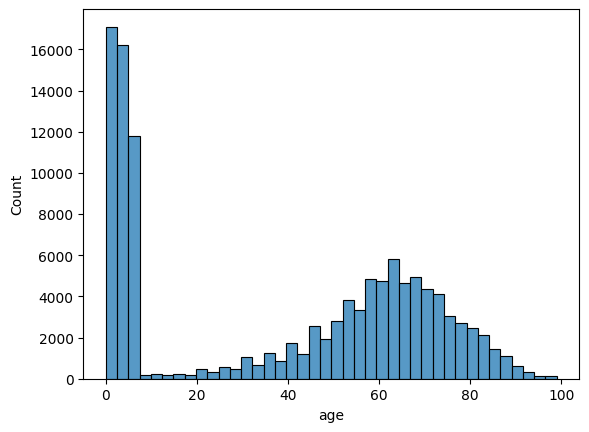

In [40]:
sns.histplot(personal_info[personal_info['degree'].isna()]['age'])

In [43]:
(personal_info[personal_info['degree'].isna()]['literacy']=='literate').sum()

0

### All null values at degree column are illiterated

In [54]:
degree_map={
    np.nan:0,
    'Elemantry':1,
    'Secondary':2,
    'HighSchool':3,
    'Diploma':4,
    'College':5,
    'Bachelor':6,
    'Master':7,
    'PhD':8,
    'Other':9
}
personal_info['degree']=personal_info['degree'].map(degree_map)

In [55]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        516888 non-null  object
 6   studying        516888 non-null  object
 7   degree          516888 non-null  int64 
 8   occupationalst  438828 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(4), object(8)
memory usage: 51.3+ MB


In [59]:
personal_info.occupationalst.value_counts()

occupationalst
employed       141886
Housewife      131766
Student         77924
IncomeWOJob     53262
unemployed      24417
Other            9573
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

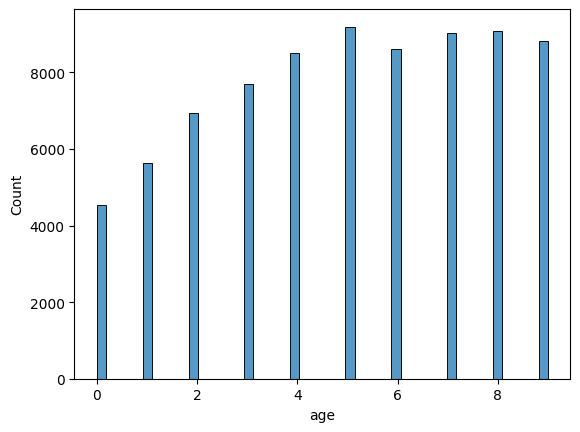

In [58]:
sns.histplot(personal_info[personal_info.occupationalst.isna()].age)

### All null values at occupationalst are kids

### They should be student so we fill it as Student

In [60]:
personal_info.occupationalst.fillna('Student',inplace=True)

In [61]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        516888 non-null  object
 6   studying        516888 non-null  object
 7   degree          516888 non-null  int64 
 8   occupationalst  516888 non-null  object
 9   maritalst       438835 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(4), object(8)
memory usage: 51.3+ MB


<Axes: xlabel='age', ylabel='Count'>

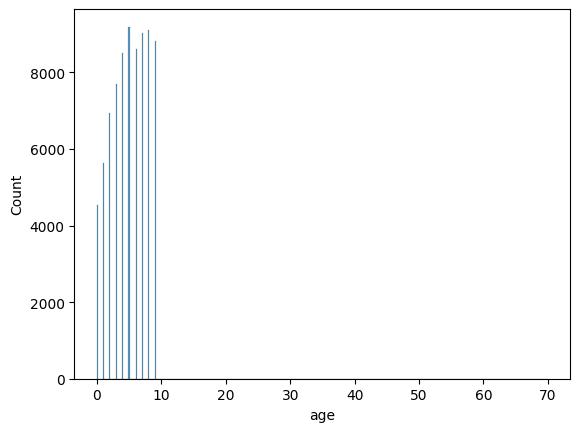

In [64]:
sns.histplot(personal_info[personal_info.maritalst.isna()].age)

In [65]:
personal_info[personal_info.maritalst.isna()].age.max()

70

### They are kids or too old, so they are Single

In [66]:
personal_info.maritalst.fillna('Single',inplace=True)

In [67]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516888 entries, 0 to 64734
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Address         516888 non-null  int64 
 1   member          516888 non-null  int64 
 2   relation        516888 non-null  object
 3   gender          516888 non-null  object
 4   age             516888 non-null  int64 
 5   literacy        516888 non-null  object
 6   studying        516888 non-null  object
 7   degree          516888 non-null  int64 
 8   occupationalst  516888 non-null  object
 9   maritalst       516888 non-null  object
 10  year            516888 non-null  object
 11  state           516888 non-null  object
dtypes: int64(4), object(8)
memory usage: 51.3+ MB


In [68]:
personal_info

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year,state
0,20010394208,1,Head,Male,50,literate,No,1,employed,Married,98,R
1,20010394208,2,Spouse,Female,45,illiterate,No,0,Housewife,Married,98,R
2,20010394208,3,Child,Female,26,literate,No,1,Housewife,Married,98,R
3,20010394208,4,Child,Male,25,literate,No,6,employed,Single,98,R
4,20010394208,5,Child,Male,14,literate,Yes,2,Student,Single,98,R
...,...,...,...,...,...,...,...,...,...,...,...,...
64730,12603320429,3,Child,Male,43,literate,No,4,employed,Single,1401,U
64731,12603320429,4,Child,Male,27,literate,No,2,unemployed,Single,1401,U
64732,12603320429,5,Child,Female,40,literate,No,4,employed,Divorced,1401,U
64733,12603320429,6,Child,Male,37,literate,No,4,employed,Single,1401,U


### i dont use LanelEncoder or OneHotEncoder cause maybe somebody needs the labels

In [70]:
personal_info.to_csv('personal_informations.csv')

In [71]:
x=pd.read_csv('personal_informations.csv')
x

,Unnamed: 0,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year,state
0,0,20010394208,1,Head,Male,50,literate,No,1,employed,Married,98,R
1,1,20010394208,2,Spouse,Female,45,illiterate,No,0,Housewife,Married,98,R
2,2,20010394208,3,Child,Female,26,literate,No,1,Housewife,Married,98,R
3,3,20010394208,4,Child,Male,25,literate,No,6,employed,Single,98,R
4,4,20010394208,5,Child,Male,14,literate,Yes,2,Student,Single,98,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516883,64730,12603320429,3,Child,Male,43,literate,No,4,employed,Single,1401,U
516884,64731,12603320429,4,Child,Male,27,literate,No,2,unemployed,Single,1401,U
516885,64732,12603320429,5,Child,Female,40,literate,No,4,employed,Divorced,1401,U
516886,64733,12603320429,6,Child,Male,37,literate,No,4,employed,Single,1401,U
